In [1]:
import os
import re
import pandas as pd
from pandasql import sqldf
import yfinance as yf

pysqldf = lambda q: sqldf(q, globals())

https://github.com/ranaroussi/yfinance

ETF = '^HSI'
ETF = '^DJI'
ETF = '^GSPC'
ETF = '^NDX'

In [2]:
hold_duration_years = 5

In [3]:
%run data_collection_GSPC.ipynb

In [4]:
hold_duration_days = 252*hold_duration_years

date_column = 'Date'
price_column = 'Close'

start_date = '0000-01-01'
end_date = '2025-01-01'

In [5]:
data

,Date,Open,High,Low,Close,Volume,id
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,1
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,3
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,4
...,...,...,...,...,...,...,...
23876,2023-01-19,3911.840088,3922.939941,3885.540039,3898.850098,3991500000,23876
23877,2023-01-20,3909.040039,3972.959961,3897.860107,3972.610107,4013360000,23877
23878,2023-01-23,3978.139893,4039.310059,3971.639893,4019.810059,3945210000,23878
23879,2023-01-24,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,23879


data.to_excel(
    f'{ETF}.xlsx',
    index = False,
    )

data = pd.read_excel(f'{ETF}.xlsx',)

In [6]:
data = pysqldf(u"""
    select 
    id,
    {} as date,
    {} as price
    from data
    """.format(
    date_column, 
    price_column
   ))

data = pysqldf(u"""
    select *
    from data
    where date >= '{}' and date <= '{}'
    order by date asc
    """.format(
    start_date, 
    end_date))

In [7]:
data

,id,date,price
0,0,1927-12-30,17.660000
1,1,1928-01-03,17.760000
2,2,1928-01-04,17.719999
3,3,1928-01-05,17.549999
4,4,1928-01-06,17.660000
...,...,...,...
23876,23876,2023-01-19,3898.850098
23877,23877,2023-01-20,3972.610107
23878,23878,2023-01-23,4019.810059
23879,23879,2023-01-24,4016.949951


# the return

In [8]:
holding = pysqldf(u"""
    select 
    data.date,
    data.price,
    pre_data.date as pre_date,
    pre_data.price as pre_price,
    data.price/pre_data.price as price_ratio
    from data
    join data as pre_data on pre_data.id+{} = data.id
    """.format(hold_duration_days))

In [9]:
holding = pysqldf(u"""
    select *,
    price_ratio -1 as return
    from holding
    """)

In [10]:
holding

,date,price,pre_date,pre_price,price_ratio,return
0,1933-01-12,7.230000,1927-12-30,17.660000,0.409400,-0.590600
1,1933-01-13,7.250000,1928-01-03,17.760000,0.408221,-0.591779
2,1933-01-16,7.060000,1928-01-04,17.719999,0.398420,-0.601580
3,1933-01-17,7.080000,1928-01-05,17.549999,0.403419,-0.596581
4,1933-01-18,6.950000,1928-01-06,17.660000,0.393545,-0.606455
...,...,...,...,...,...,...
22616,2023-01-19,3898.850098,2018-01-17,2802.560059,1.391175,0.391175
22617,2023-01-20,3972.610107,2018-01-18,2798.030029,1.419788,0.419788
22618,2023-01-23,4019.810059,2018-01-19,2810.300049,1.430385,0.430385
22619,2023-01-24,4016.949951,2018-01-22,2832.969971,1.417929,0.417929


<AxesSubplot: xlabel='date'>

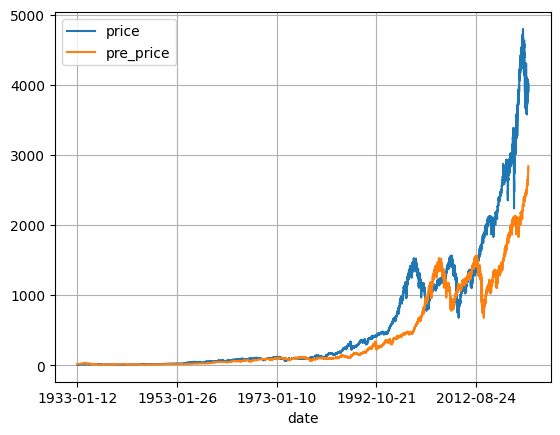

In [11]:
holding.plot(x ='date', y=[
    'price', 
    'pre_price', 
    ], grid = True)

<AxesSubplot: xlabel='date'>

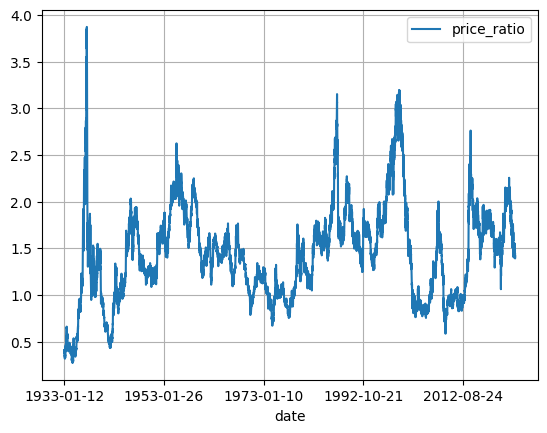

In [12]:
holding.plot(x ='date', y=[
    'price_ratio', 
    ], grid = True)

In [13]:
holding

,date,price,pre_date,pre_price,price_ratio,return
0,1933-01-12,7.230000,1927-12-30,17.660000,0.409400,-0.590600
1,1933-01-13,7.250000,1928-01-03,17.760000,0.408221,-0.591779
2,1933-01-16,7.060000,1928-01-04,17.719999,0.398420,-0.601580
3,1933-01-17,7.080000,1928-01-05,17.549999,0.403419,-0.596581
4,1933-01-18,6.950000,1928-01-06,17.660000,0.393545,-0.606455
...,...,...,...,...,...,...
22616,2023-01-19,3898.850098,2018-01-17,2802.560059,1.391175,0.391175
22617,2023-01-20,3972.610107,2018-01-18,2798.030029,1.419788,0.419788
22618,2023-01-23,4019.810059,2018-01-19,2810.300049,1.430385,0.430385
22619,2023-01-24,4016.949951,2018-01-22,2832.969971,1.417929,0.417929


<AxesSubplot: >

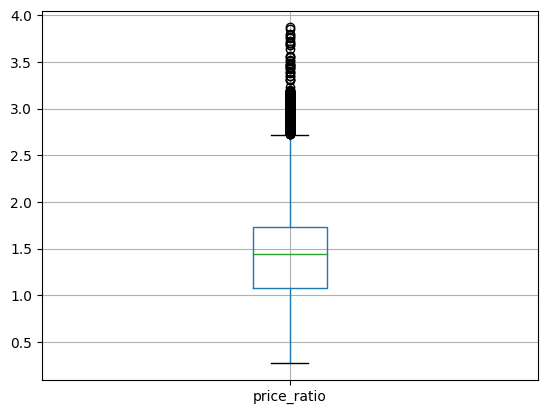

In [14]:
holding.boxplot(column=['price_ratio']) 

In [15]:
price_ratio = holding['price_ratio'].median()

print('Ratio:\t%0.4f'%(price_ratio))

Ratio:	1.4436


In [16]:
return_mean = holding['return'].mean()

return_std = holding['return'].std()

print(f'return: {return_mean:0.4f} / {return_std:0.4f}')

return: 0.4431 / 0.5012


END